# micrograd

In [106]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from graphviz import Digraph
import matplotlib.image as mpimg

In [5]:
def f(x):
    return 3*(x*x) - 4*x + 5

In [6]:
f(3.0)

20.0

In [9]:
x_values = np.arange(-5,5,0.25)
y_values = f(x_values)
print("x:")
print(x_values)
print("y:")
print(y_values)

x:
[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
y:
[100.      91.6875  83.75    76.1875  69.      62.1875  55.75    49.6875
  44.      38.6875  33.75    29.1875  25.      21.1875  17.75    14.6875
  12.       9.6875   7.75     6.1875   5.       4.1875   3.75     3.6875
   4.       4.6875   5.75     7.1875   9.      11.1875  13.75    16.6875
  20.      23.6875  27.75    32.1875  37.      42.1875  47.75    53.6875]


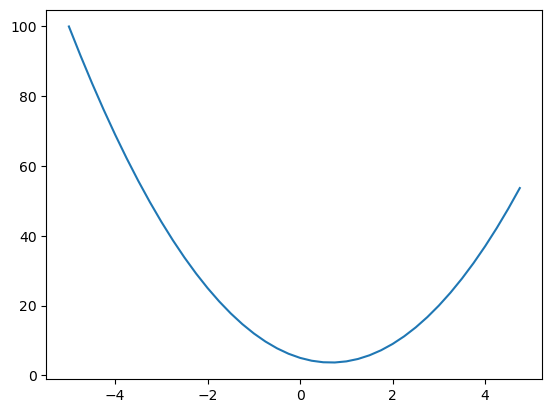

In [10]:
plt.plot(x_values,y_values)

In [12]:
h = 0.001
x = 3.0

print(f(x))
print(f(x+h))

print((f(x+h)-f(x))/h)

20.0
20.014003000000002
14.00300000000243


In [13]:
h = 0.001
x = -3.0

print(f(x))
print(f(x+h))

print((f(x+h)-f(x))/h)

44.0
43.978003
-21.996999999998934


In [14]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c
print("d1",d1)
print("d2",d2)
print("slope",(d2-d1)/h)

d1 = a*b + c
b += h
d2 = a*b + c
print("d1",d1)
print("d2",d2)
print("slope",(d2-d1)/h)

d1 = a*b + c
c += h
d2 = a*b + c
print("d1",d1)
print("d2",d2)
print("slope",(d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772
d1 3.999699999999999
d2 3.99990001
slope 2.0001000000124947
d1 3.99990001
d2 4.00000001
slope 0.9999999999976694


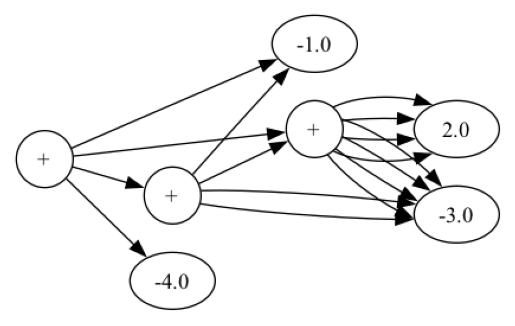

In [ ]:
class Value:
    def __init__(self,data,children=(),operator=""):
        self.data = data
        self.children = children
        self.operator = operator
    
    def __repr__(self):
        return f"value(data={self.data})"
    #bir nesneyi temsil eden string'i döner
    #f = formatted string

    def __add__(self,other):
        result = self.data + other.data
        return Value(result,(self,other),"+")
    
    def __mul__(self,other):
        result = self.data * other.data
        return Value(result,(self,other),"*")

In [92]:
a = Value(2.0)
b = Value(-3.0)

print(a)
print(b)

print(a + b)
print(a * b)

c = a + b

print("c: ",c)
print("c children: ",c.children)
print("c operator: ",c.operator)

value(data=2.0)
value(data=-3.0)
value(data=-1.0)
value(data=-6.0)
c:  value(data=-1.0)
c children:  (value(data=2.0), value(data=-3.0))
c operator:  +


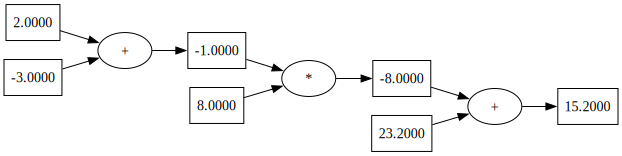

In [119]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.children:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def visaulize(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{%.4f}" % (n.data), shape='record')
        if n.operator:
            dot.node(name = uid + n.operator, label = n.operator)
            dot.edge(uid + n.operator, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.operator)

    return dot    
    
a = Value(2.0)
b = a + Value(-3.0) 
c = b * Value(8.0)
d = c + Value(23.2)
visaulize(d)